## Import Dependencies in Python

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
get_ipython().run_line_magic('matplotlib', 'inline')
from pmdarima.arima import auto_arima
import warnings
warnings.filterwarnings('ignore')
import datetime
import quandl
from plotnine import *

## Getting WTI monthly data from QUANDL

In [6]:
WTI = quandl.get("FRED/DCOILWTICO", start_date="1990-01-01", end_date="2020-06-01",  authtoken="TYxF4cUU1kEsRwg8QEdu", collapse="monthly", order="asc")
print(WTI)
WTI.to_csv("WTI.csv")

            Value
Date             
1990-01-31  22.69
1990-02-28  21.55
1990-03-31  20.34
1990-04-30  18.50
1990-05-31  17.47
...           ...
2020-02-29  44.83
2020-03-31  20.51
2020-04-30  19.23
2020-05-31  35.57
2020-06-30  35.49

[366 rows x 1 columns]


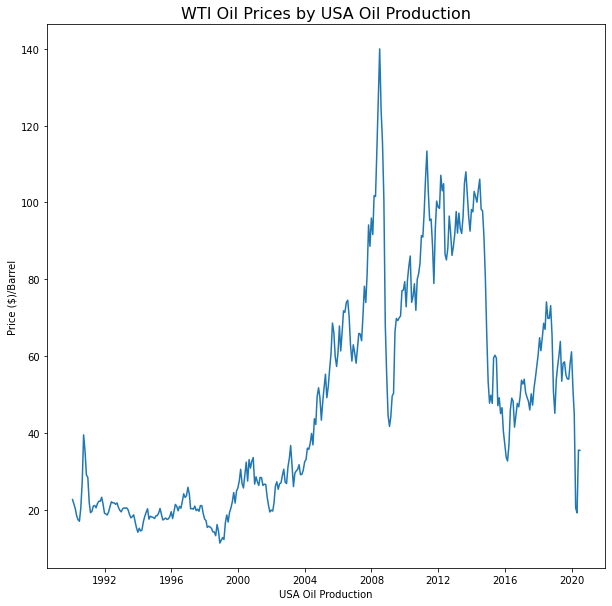

In [46]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
fig = plt.plot(WTI)
ax.set_xlabel('USA Oil Production')
ax.set_ylabel('Price ($)/Barrel')
plt.title('WTI Oil Prices by USA Oil Production', fontsize=16)
plt.show()

## Getting BRENT monthly data from QUANDL

In [31]:
BRENT = quandl.get("FRED/DCOILBRENTEU", start_date="1990-01-01", end_date="2020-06-01",  authtoken="TYxF4cUU1kEsRwg8QEdu", collapse="monthly", order="asc")
print(BRENT)
BRENT.to_csv("BRENT.csv")

            Value
Date             
1990-01-31  20.50
1990-02-28  19.20
1990-03-31  17.95
1990-04-30  16.35
1990-05-31  15.30
...           ...
2020-02-29  51.31
2020-03-31  14.85
2020-04-30  18.11
2020-05-31  34.15
2020-06-30  36.74

[366 rows x 1 columns]


## Getting ARAB LIGHT monthly data


In [32]:
ARAB_LIGHT = quandl.get("EIA/PET_ISA4990008_M", start_date="1990-01-01", end_date="2020-06-01",  authtoken="TYxF4cUU1kEsRwg8QEdu", collapse="monthly", order="asc")
print(ARAB_LIGHT)
ARAB_LIGHT.to_csv("ARAB_LIGHT.csv")

            Value
Date             
1990-01-31  19.73
1990-02-28  18.71
1990-03-31  16.76
1990-04-30  14.86
1990-05-31  14.72
...           ...
2020-01-31  51.55
2020-02-29  52.48
2020-03-31  24.14
2020-04-30  22.30
2020-05-31  31.84

[358 rows x 1 columns]


## Put WTI data into dataframe with dates as index

In [33]:
WTI_data = pd.read_csv('WTI.csv', parse_dates=['Date'], index_col='Date')
print (WTI_data.head())

            Value
Date             
1990-01-31  22.69
1990-02-28  21.55
1990-03-31  20.34
1990-04-30  18.50
1990-05-31  17.47


## Put BRENT data into dataframe with dates as index

In [34]:
BRENT_data = pd.read_csv('BRENT.csv', parse_dates=['Date'], index_col='Date')
print (BRENT_data.head())

            Value
Date             
1990-01-31  20.50
1990-02-28  19.20
1990-03-31  17.95
1990-04-30  16.35
1990-05-31  15.30


## Put ARAB LIGHT data into dataframe with dates as index

In [35]:
#Put ARAB_LIGHT data into dataframes with dates as index
ARAB_LIGHT_data = pd.read_csv('ARAB_LIGHT.csv', parse_dates=['Date'], index_col='Date')
print (ARAB_LIGHT_data.head())

            Value
Date             
1990-01-31  19.73
1990-02-28  18.71
1990-03-31  16.76
1990-04-30  14.86
1990-05-31  14.72


## Merge WTI, BRENT, and ARAB Light datasets into one dataset

In [36]:
oil_data=pd.merge(WTI_data,BRENT_data, on='Date',how='outer')
oil_data=oil_data.rename(columns={"Value_x": "WTI", "Value_y": "BRENT"})
oil_data=pd.merge(oil_data, ARAB_LIGHT_data,on='Date',how='outer')
oil_data=oil_data.rename(columns={"Value": "ARAB Light"})
oil_data

,WTI,BRENT,ARAB Light
Date,,,
1990-01-31,22.69,20.50,19.73
1990-02-28,21.55,19.20,18.71
1990-03-31,20.34,17.95,16.76
1990-04-30,18.50,16.35,14.86
1990-05-31,17.47,15.30,14.72
...,...,...,...
2020-02-29,44.83,51.31,52.48
2020-03-31,20.51,14.85,24.14
2020-04-30,19.23,18.11,22.30


## Check for Null Values and use a Forward Fill Resample Method to Fill in the Missing Values with Most Recent Value

In [39]:
oil_data.isnull().values.any()

True

In [40]:
oil_data = oil_data.fillna(method='ffill')

In [41]:
oil_data.isnull().values.any()

False

In [42]:
oil_data 

,WTI,BRENT,ARAB Light
Date,,,
1990-01-31,22.69,20.50,19.73
1990-02-28,21.55,19.20,18.71
1990-03-31,20.34,17.95,16.76
1990-04-30,18.50,16.35,14.86
1990-05-31,17.47,15.30,14.72
...,...,...,...
2020-02-29,44.83,51.31,52.48
2020-03-31,20.51,14.85,24.14
2020-04-30,19.23,18.11,22.30


## Step 1: Plot WTI, BRENT, and ARAB LIGHT data for to visually inspect time series data

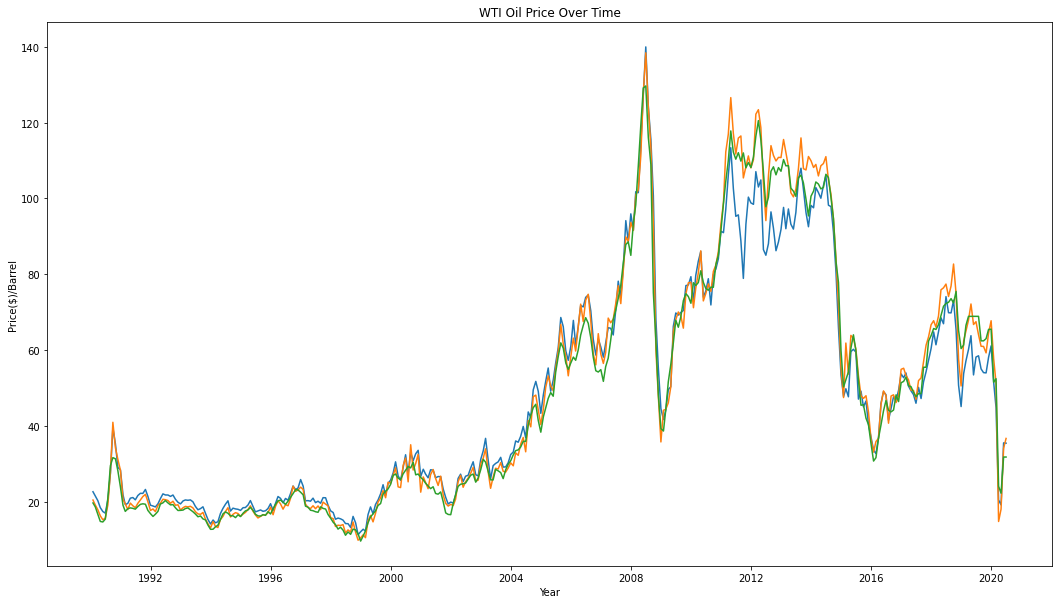

In [49]:
plt.xlabel('Year')
plt.ylabel('Price($)/Barrel')
plt.title('WTI Oil Price Over Time')
plt.plot(oil_data)
plt.rcParams["figure.figsize"] = [18,10]

In [14]:
WTI_ts=oil_data['WTI']
BRENT_ts=oil_data['BRENT']
ARAB_LIGHT_ts=oil_data['ARAB Light']

# Step 2: Determine Whether Time Series Data are Stationary 
## Step 2a: Plot the rolling means and rolling standard deviations of time series data
#### The time series is stationary if the means and SD remain constant with time
## Step 2b: Test for Stationarity in the time series data using the Dickey-Fuller Test.
#### If the p-value for this test is > .05 on the test, we accept the null hypothesis and conclude the time series is not stationary. 
#### If the p-value  for this test is <= .05, we reject the null hypothesis and conclude the time series is stationary.
#### If the ADF Statistic is much lower than the critical values, that also confirms the time series is stationary.

In [15]:
def test_stationarity(timeseries):
    
    # rolling statistics
    rolling_mean = timeseries.rolling(window=12).mean()
    rolling_std = timeseries.rolling(window=12).std()
    
    # rolling statistics plot
    original = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(rolling_mean, color='red', label='Rolling Mean')
    std = plt.plot(rolling_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.rcParams["figure.figsize"] = [18,10]
    plt.show(block=False)
    
    # Dickey–Fuller test:
    result = adfuller(timeseries)
    print('ADF Statistic: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {}'.format(key, value))

## Stationarity Tests

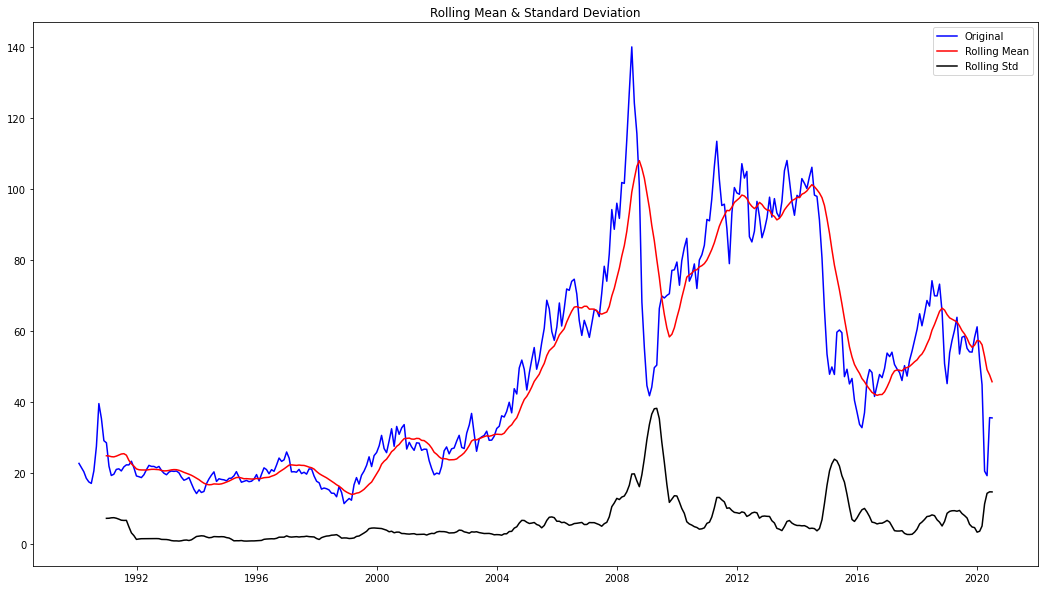

ADF Statistic: -2.2421730012268637
p-value: 0.19129653045751688
Critical Values:
	1%: -3.4484434475193777
	5%: -2.869513170510808
	10%: -2.571017574266393


In [16]:
test_stationarity(WTI_ts)

### As we can see in the figure and Dickey Fuller test above, the WTI time series data are not stationary. The rolling mean and SD are not constant over time,  the WTI Dickey Fuller test is  > .05. Thus, we accept the null hypothesis and conclude the data is non-stationary.

## BRENT Stationarity Tests

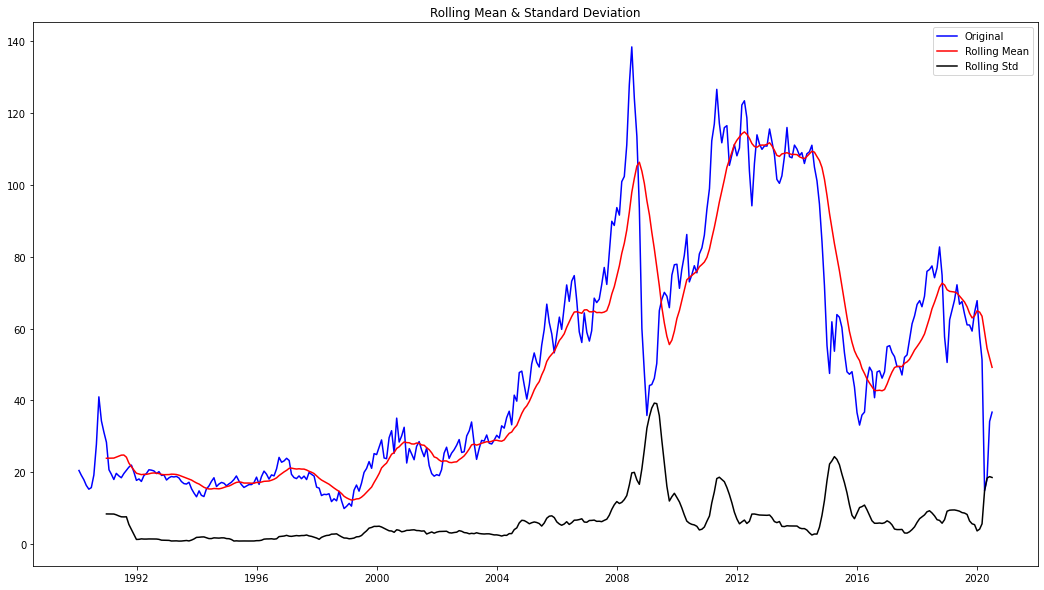

ADF Statistic: -2.204984301519696
p-value: 0.20444141916575093
Critical Values:
	1%: -3.4484434475193777
	5%: -2.869513170510808
	10%: -2.571017574266393


In [17]:
test_stationarity(BRENT_ts)

### As we can see in the figure and Dickey Fuller test above, the BRENT time series data are not stationary. The rolling mean and SD are not constant over time,  the WTI Dickey Fuller test is  > .05. Thus, we accept the null hypothesis and conclude the data is non-stationary.

## ARAB LIGHT Stationarity Tests

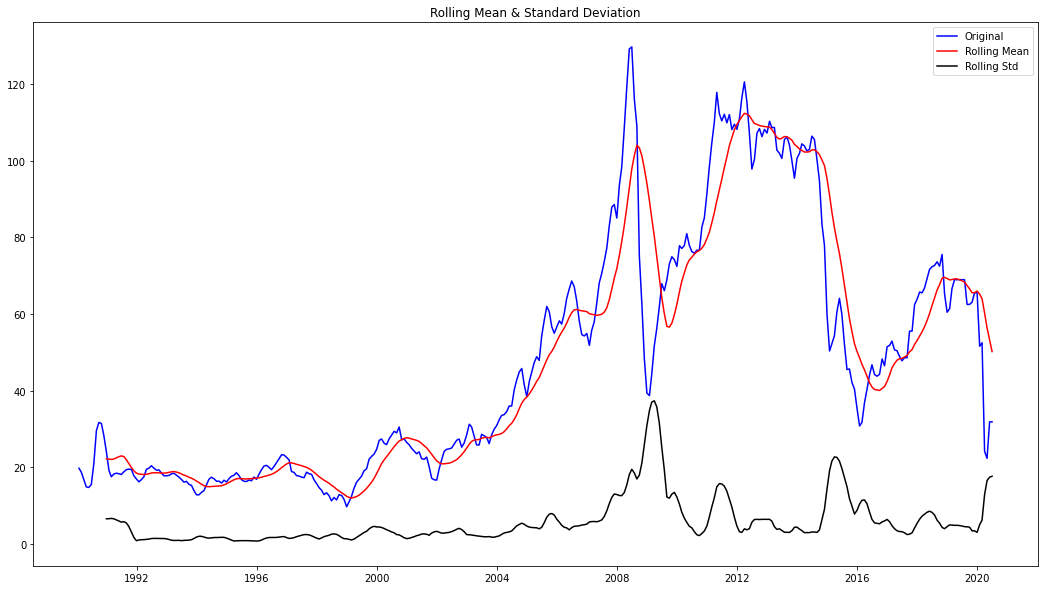

ADF Statistic: -1.5996968868051693
p-value: 0.483745732464127
Critical Values:
	1%: -3.4490114443793214
	5%: -2.8697627072503757
	10%: -2.5711506161673716


In [18]:
test_stationarity(ARAB_LIGHT_ts)

### As we can see in the figure and Dickey Fuller test above, the ARAB time series data are not stationary. The rolling mean and SD are not constant over time,  the WTI Dickey Fuller test is  > .05. Thus, we accept the null hypothesis and conclude the data is non-stationary.

## Differencing the Data - Transform the data 

In [19]:
WTI_log = np.log(WTI_ts)
BRENT_log = np.log(BRENT_ts)
ARAB_LIGHT_log = np.log(ARAB_LIGHT_ts)
WTI_log_diff = WTI_log - WTI_log.shift()
WTI_log_diff.dropna(inplace=True)
BRENT_log_diff = BRENT_log - BRENT_log.shift()
BRENT_log_diff.dropna(inplace=True)
ARAB_LIGHT_log_diff = ARAB_LIGHT_log - ARAB_LIGHT_log.shift()
ARAB_LIGHT_log_diff.dropna(inplace=True)

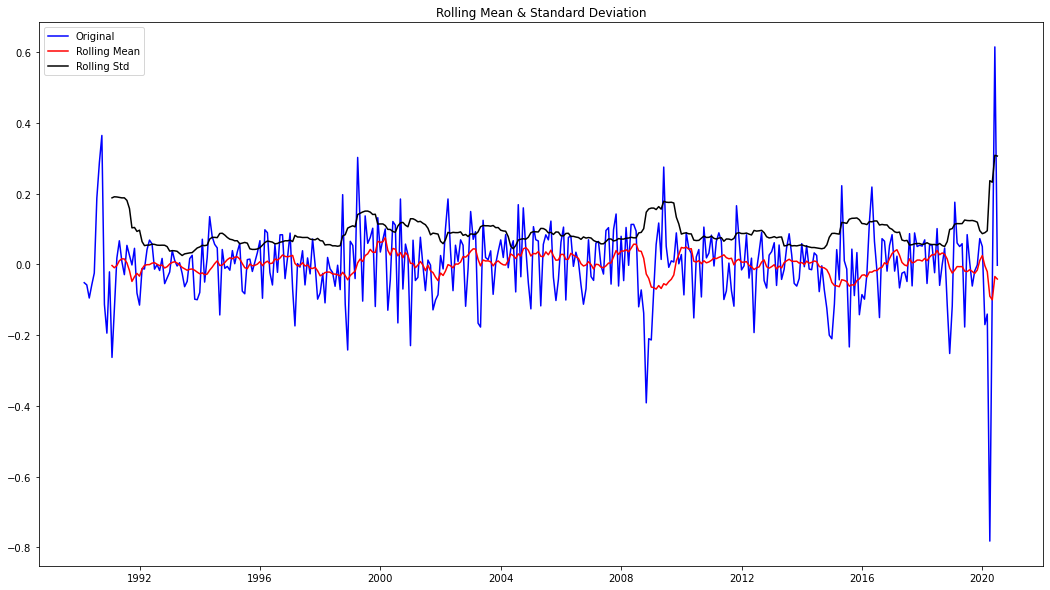

ADF Statistic: -8.695375340950026
p-value: 3.938069063496756e-14
Critical Values:
	1%: -3.448748905151901
	5%: -2.8696473721448728
	10%: -2.5710891239349585


In [20]:
test_stationarity(WTI_log_diff)

### As we can see in the figure and Dickey Fuller test above, the transformed log differenced WTI time series data are stationary. The rolling mean and SD are relatively constant over time, the WTI Dickey Fuller test is  < .05, and the ADF statistic is much lower than the critical values. Thus, we can reject the null hypothesis and conclude the data stationary.

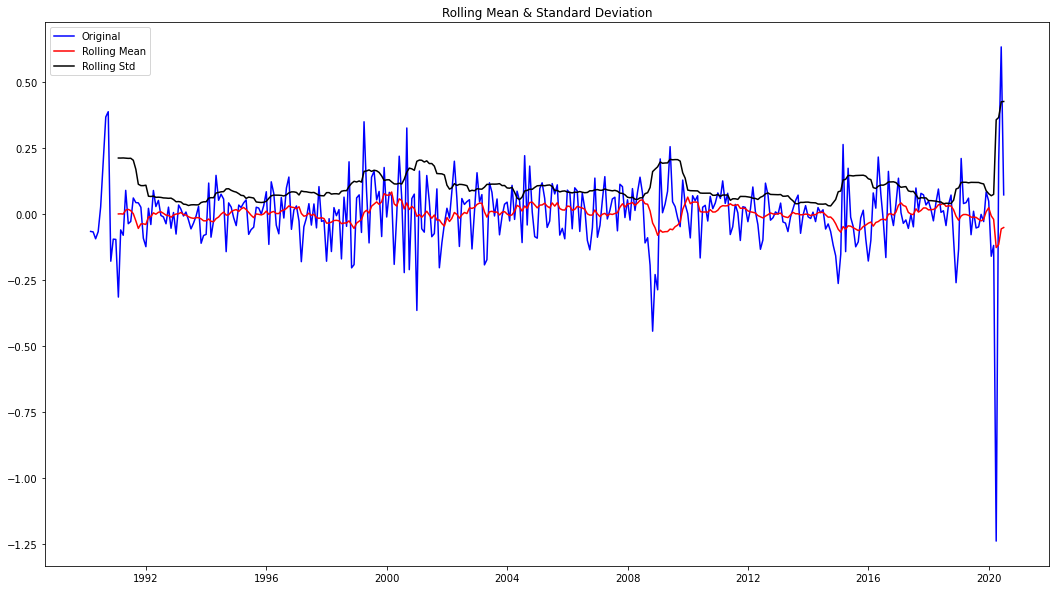

ADF Statistic: -14.151908118282382
p-value: 2.1545202896063786e-26
Critical Values:
	1%: -3.448493650810824
	5%: -2.8695352280356556
	10%: -2.5710293341377715


In [21]:
test_stationarity(BRENT_log_diff)

### As we can see in the figure and Dickey Fuller test above, the transformed log differenced BRENT time series data are stationary. The rolling mean and SD are relatively constant over time, the WTI Dickey Fuller test is  < .05, and the ADF statistic is much lower than the critical values. Thus, we can reject the null hypothesis and conclude the data stationary.

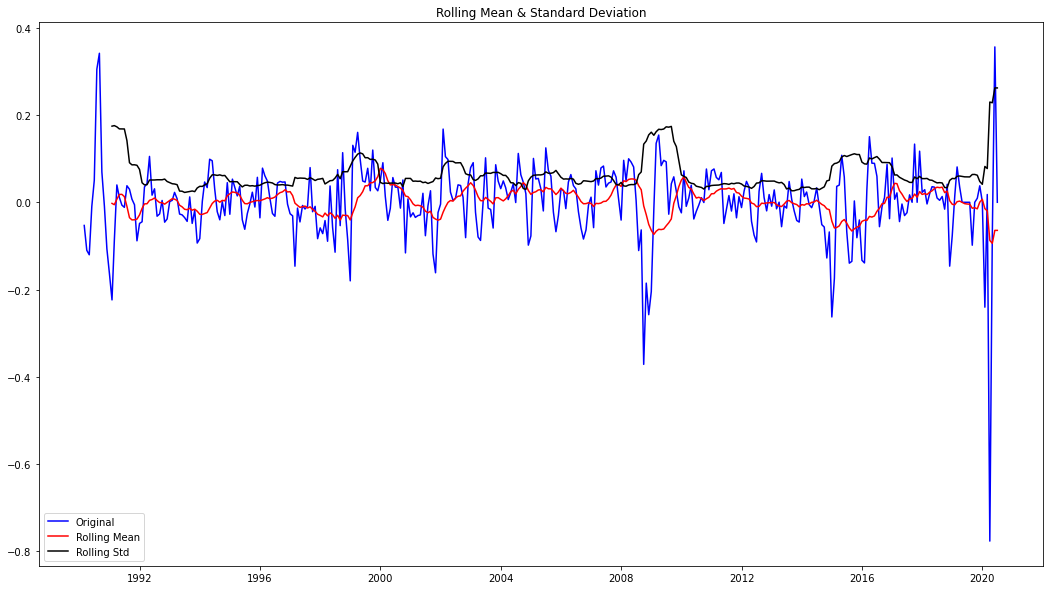

ADF Statistic: -10.60188979610204
p-value: 6.140853297907404e-19
Critical Values:
	1%: -3.4485948978753314
	5%: -2.86957971128312
	10%: -2.571053050314224


In [22]:
test_stationarity(ARAB_LIGHT_log_diff)

### As we can see in the figure and Dickey Fuller test above, the transformed log differenced ARAB LIGHT time series data are stationary. The rolling mean and SD are relatively constant over time, the WTI Dickey Fuller test is  < .05, and the ADF statistic is much lower than the critical values. Thus, we can reject the null hypothesis and conclude the data stationary.

# Step 3: Explore Autocorrelation Functioms (ACF) and Partial Autocorrelation Functions (PACF)

### ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information. This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

### PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

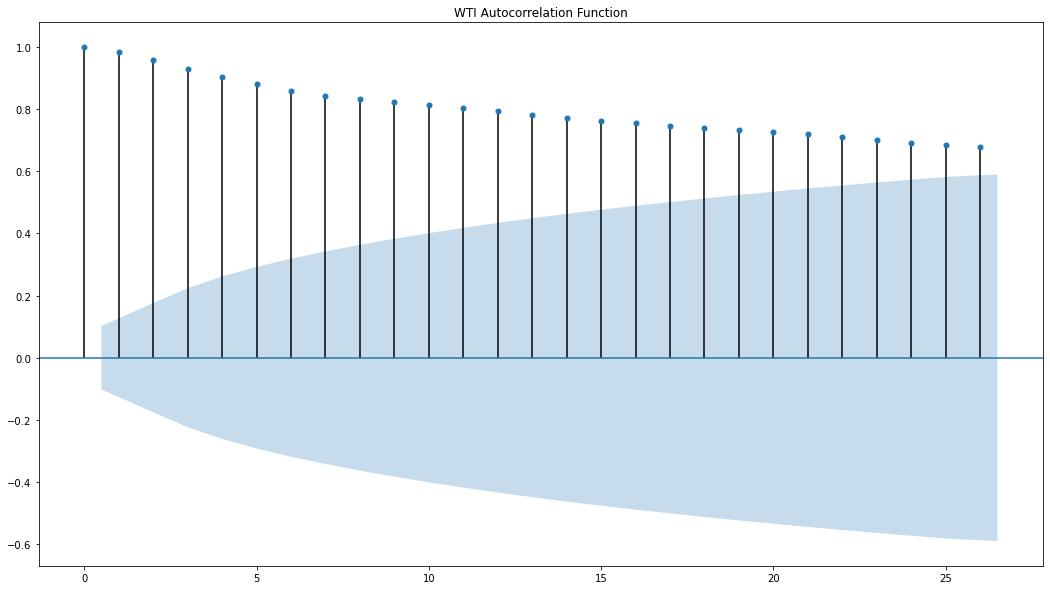

In [23]:
plot_acf(WTI_ts)
plt.title('WTI Autocorrelation Function')
plt.show()

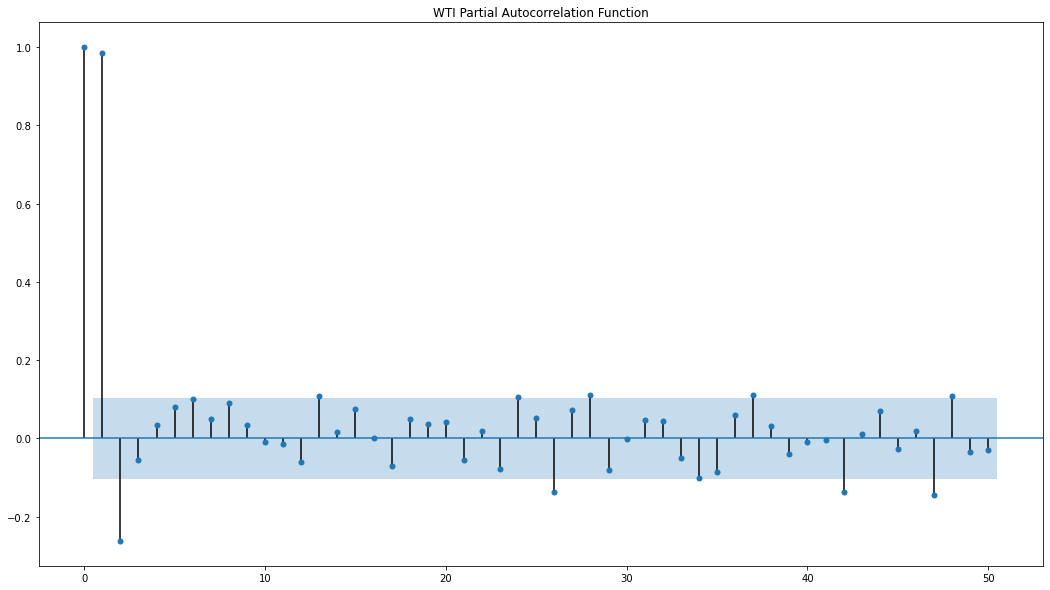

In [24]:
plot_pacf(WTI_ts, lags=50)
plt.title('WTI Partial Autocorrelation Function')
plt.show()

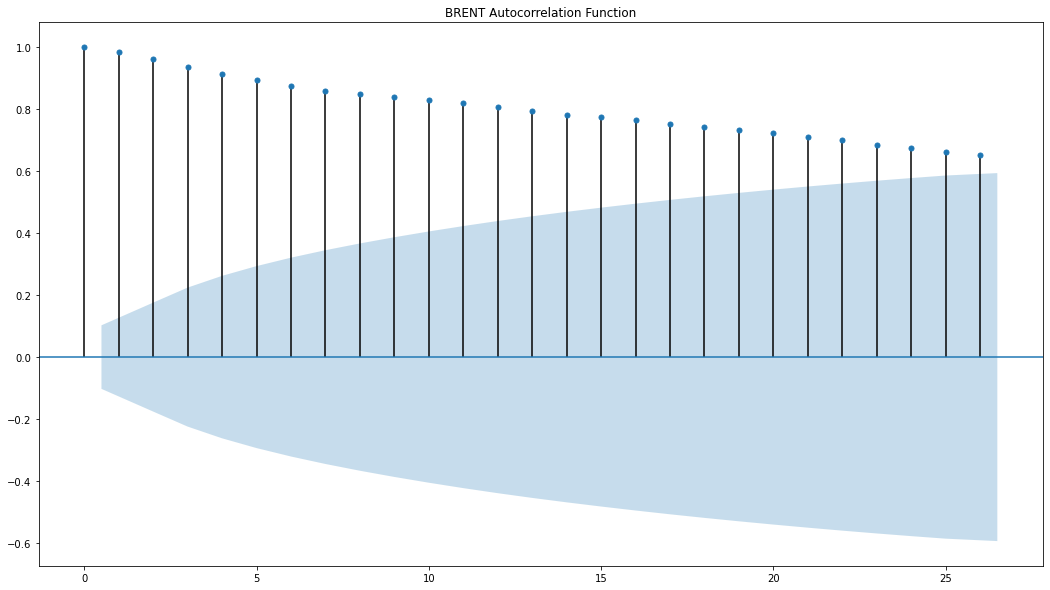

In [25]:
plot_acf(BRENT_ts)
plt.title('BRENT Autocorrelation Function')
plt.show()

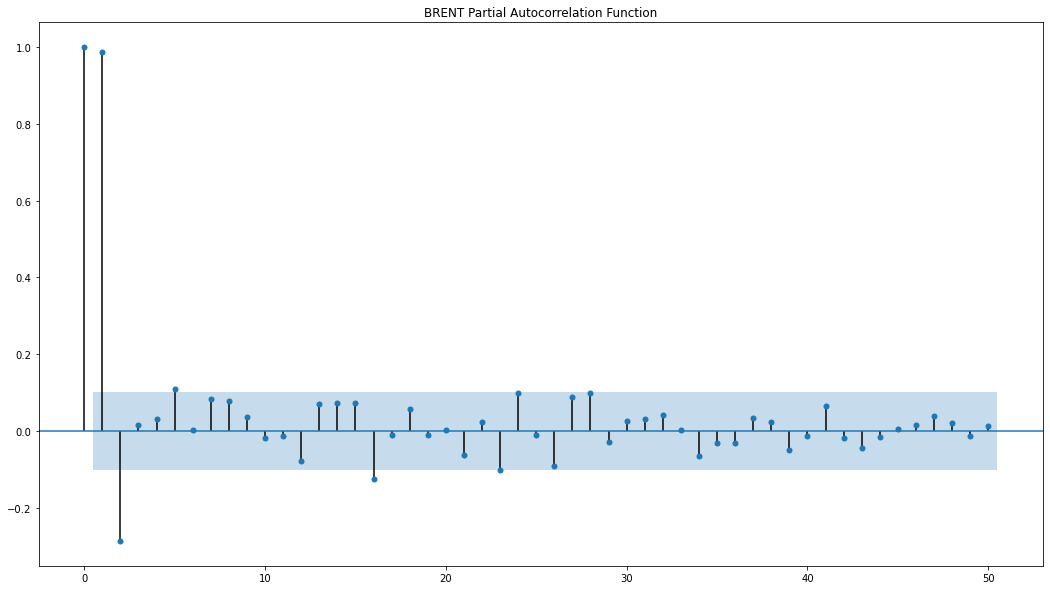

In [26]:
plot_pacf(BRENT_ts, lags=50)
plt.title('BRENT Partial Autocorrelation Function')
plt.show()

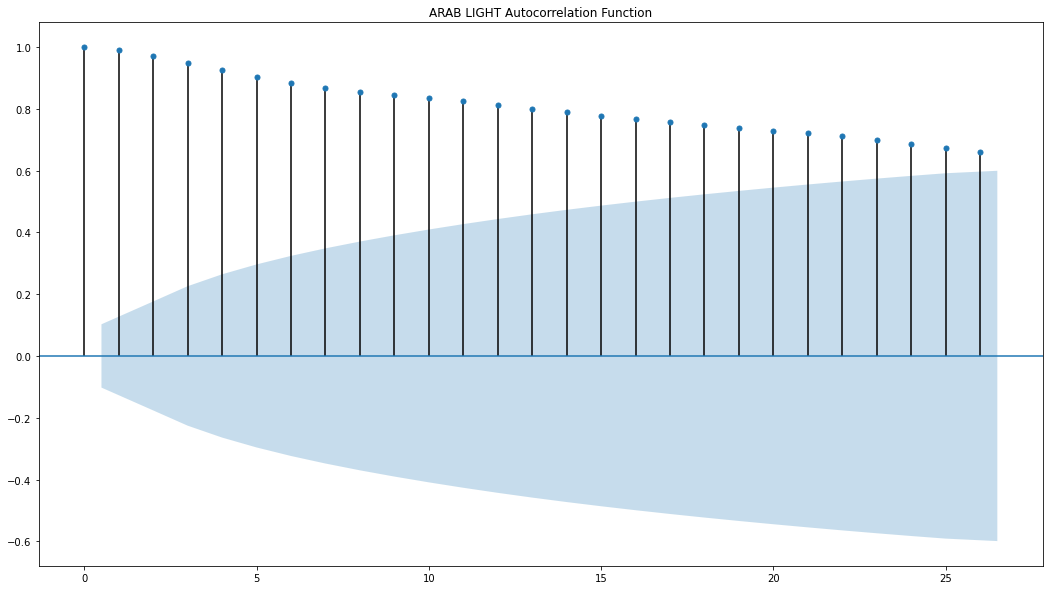

In [27]:
plot_acf(ARAB_LIGHT_ts)
plt.title('ARAB LIGHT Autocorrelation Function')
plt.show()

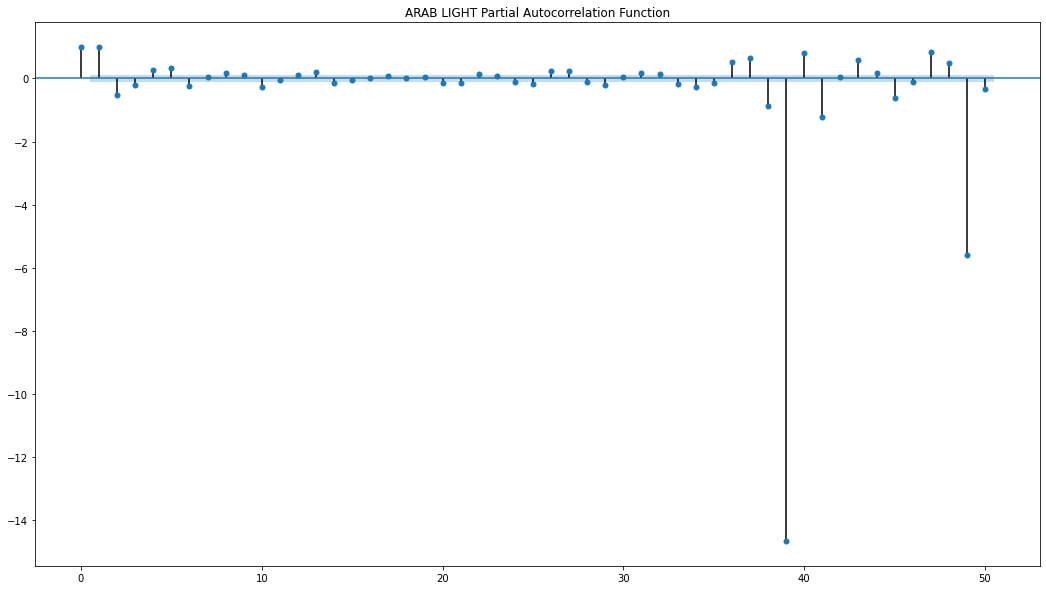

In [28]:
plot_pacf(ARAB_LIGHT_ts, lags=50)
plt.title('ARAB LIGHT Partial Autocorrelation Function')
plt.show()

# STEP 4) Running an ARIMA model

## Step 4a) Spliting the datasets into training and test datasets 

In [29]:
WTI_train = WTI_ts[:318]
WTI_test = WTI_ts[-48:]
BRENT_train = BRENT_ts[:318]
BRENT_test = BRENT_ts[-48:]
ARAB_LIGHT_train = ARAB_LIGHT_ts[:318]
ARAB_LIGHT_test = ARAB_LIGHT_ts[-48:]

## Step 4b) Run auto-ARIMA procedure for evaluating the combinations of p, d and q values to find the best fitting ARIMA models for each oil type.
### ARIMA model paramters:
###     p: The order of the auto-regressive (AR) model (i.e., the number of lag observations)
###     d: The degree of differencing.
###     q: The order of the moving average (MA) model. The size of the “window” function over your time series data.


### Evaluating ARIMA hyperparatmers for WTI

In [30]:
WTI_arima_model =  auto_arima(WTI_train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2069.392, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1976.334, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.53 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2061.513, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1950.452, Time=0.56 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1934.551, Time=1.09 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=1924.640, Time=1.71 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=1904.438, Time=4.19 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=1884.897, Time=10.96 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=1886.669, Time=6.98 sec
 ARIMA(1,1,0)(5,1,2)[12]             : AIC=1886.869, Time=25.17 sec
 ARIMA(1,1,0)(4,1,2)[12]             : AIC=1886.963, Time=22.28 sec
 ARIMA(0,1,0)(5,1,1)[12]             : AIC=1896.946, Time=13.06 sec
 ARIMA(2,1,0)(5,1,1)[12]             : AIC=1885.966, Time=17.51 sec
 ARIMA(1,1,1)(5,1,1

#### Results: The best fitting ARIMA model for WTI is a (1, 1, 0) model. The summary of the WTI ARIMA model details below.

In [31]:
WTI_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  318
Model:             SARIMAX(1, 1, 0)x(5, 1, [1], 12)   Log Likelihood                -934.448
Date:                              Thu, 15 Oct 2020   AIC                           1884.897
Time:                                      23:42:41   BIC                           1914.659
Sample:                                           0   HQIC                          1896.801
                                              - 318                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2163      0.041      5.281      0.000       0.136       0.297
ar.S.L12      -0.2204      0.097     -2.262      0.024      -0.411      -0.029
ar.S.L24      -0.2081      0.095     -2.194      0.028      -0.394      -0.022
ar.S.L36      -0.2152      0.095     -2.262      0.024      -0.402      -0.029
ar.S.L48      -0.1898      0.087     -2.173      0.030      -0.361      -0.019
ar.S.L60      -0.1501      0.082     -1.838      0.066      -0.310       0.010
ma.S.L12      -0.7750      0.089     -8.719      0.000      -0.949      -0.601
sigma2        24.7146      1.340     18.439      0.000      22.088      27.342
===================================================================================
Ljung-Box (Q):                       45.76   Jarque-Bera (JB):               293.92
Prob(Q):                              0.25   Prob(JB):                         0.00
Heteroskedasticity (H):              14.54   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Evaluating ARIMA hyperparatmers for BRENT

In [32]:
BRENT_arima_model =  auto_arima(BRENT_train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=2081.603, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1990.891, Time=0.18 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.42 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=2067.133, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1956.198, Time=0.46 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1948.225, Time=1.09 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=1931.822, Time=2.22 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=1917.958, Time=3.73 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=1901.106, Time=11.31 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=1900.445, Time=6.14 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=1903.962, Time=4.85 sec
 ARIMA(1,1,0)(4,1,2)[12]             : AIC=1900.960, Time=11.69 sec
 ARIMA(1,1,0)(3,1,2)[12]             : AIC=inf, Time=3.67 sec
 ARIMA(1,1,0)(5,1,2)[12]             : AIC=1902.936, Time=24.05 sec
 ARIMA(0,1,0)(4,1,1)[12]  

#### Results: The best fitting ARIMA model for BRENT is a (1, 1, 0) model. The summary of the BRENT ARIMA model details below.

In [33]:
#Summary of the model
BRENT_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  318
Model:             SARIMAX(1, 1, 0)x(4, 1, [1], 12)   Log Likelihood                -943.223
Date:                              Thu, 15 Oct 2020   AIC                           1900.445
Time:                                      23:44:37   BIC                           1926.487
Sample:                                           0   HQIC                          1910.861
                                              - 318                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2536      0.036      7.132      0.000       0.184       0.323
ar.S.L12      -0.1177      0.076     -1.544      0.123      -0.267       0.032
ar.S.L24      -0.1620      0.076     -2.146      0.032      -0.310      -0.014
ar.S.L36      -0.1039      0.077     -1.350      0.177      -0.255       0.047
ar.S.L48      -0.1626      0.065     -2.499      0.012      -0.290      -0.035
ma.S.L12      -0.8142      0.067    -12.100      0.000      -0.946      -0.682
sigma2        26.4428      1.577     16.772      0.000      23.353      29.533
===================================================================================
Ljung-Box (Q):                       43.28   Jarque-Bera (JB):               156.67
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):              11.89   Skew:                            -0.65
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.27
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Evaluating ARIMA hyperparatmers for ARAB LIGHT

In [34]:
ARAB_LIGHT_arima_model =  auto_arima(ARAB_LIGHT_train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1901.236, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1719.733, Time=0.17 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.63 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1807.536, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1696.647, Time=0.42 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=1691.485, Time=0.97 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=1678.978, Time=1.67 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=1672.677, Time=3.08 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=inf, Time=17.50 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=inf, Time=9.41 sec
 ARIMA(0,1,0)(5,1,0)[12]             : AIC=1758.362, Time=2.64 sec
 ARIMA(2,1,0)(5,1,0)[12]             : AIC=1671.014, Time=4.24 sec
 ARIMA(2,1,0)(4,1,0)[12]             : AIC=1678.585, Time=1.84 sec
 ARIMA(2,1,0)(5,1,1)[12]             : AIC=inf, Time=14.17 sec
 ARIMA(2,1,0)(4,1,1)[12]             

#### Results: The best fitting ARIMA model for ARAB LIGHT is a (4, 1, 0) model. The summary of the ARAB LIGHT ARIMA model details below.

In [35]:
#Summary of the model
ARAB_LIGHT_arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  318
Model:             SARIMAX(4, 1, 0)x(5, 1, 0, 12)   Log Likelihood                -818.328
Date:                            Thu, 15 Oct 2020   AIC                           1656.655
Time:                                    23:48:39   BIC                           1693.858
Sample:                                         0   HQIC                          1671.536
                                            - 318                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4562      0.054      8.433      0.000       0.350       0.562
ar.L2          0.2323      0.041      5.638      0.000       0.152       0.313
ar.L3         -0.1611      0.051     -3.132      0.002      -0.262      -0.060
ar.L4         -0.1220      0.051     -2.413      0.016      -0.221      -0.023
ar.S.L12      -0.8153      0.037    -22.196      0.000      -0.887      -0.743
ar.S.L24      -0.6374      0.071     -9.035      0.000      -0.776      -0.499
ar.S.L36      -0.4881      0.076     -6.457      0.000      -0.636      -0.340
ar.S.L48      -0.4040      0.080     -5.021      0.000      -0.562      -0.246
ar.S.L60      -0.2157      0.064     -3.373      0.001      -0.341      -0.090
sigma2        11.9864      0.636     18.851      0.000      10.740      13.233
===================================================================================
Ljung-Box (Q):                       63.71   Jarque-Bera (JB):              1770.79
Prob(Q):                              0.01   Prob(JB):                         0.00
Heteroskedasticity (H):              21.35   Skew:                            -1.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Step 4c) Compare the predicted oil prices from the ARIMA models against the observed values from our test datasets to test the accuracy of our models

### Comparing the predicted WTI oil prices from our ARIMA models against the test data

In [36]:
WTI_prediction = pd.DataFrame(WTI_arima_model.predict(n_periods = 48),index=WTI_test.index)
WTI_prediction.columns = ['WTI_predicted_oil_price']

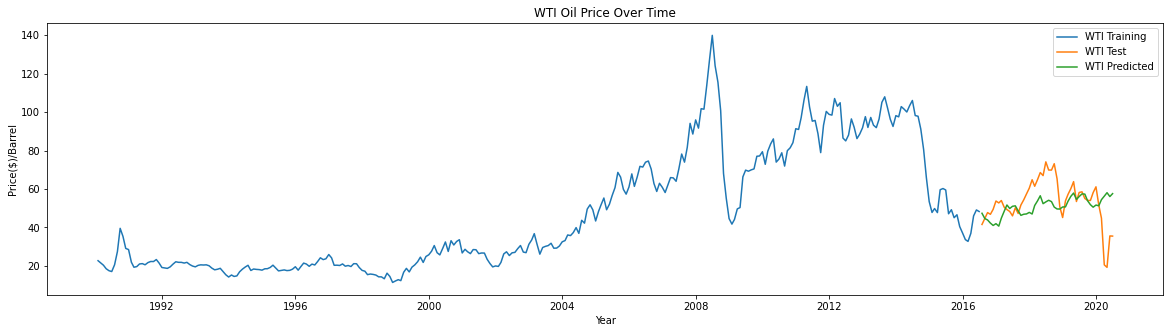

In [37]:
plt.figure(figsize=(20,5))
plt.xlabel('Year')
plt.ylabel('Price($)/Barrel')
plt.plot(WTI_train,label="WTI Training")
plt.plot(WTI_test,label="WTI Test")
plt.plot(WTI_prediction,label="WTI Predicted")
plt.title('WTI Oil Price Over Time')
plt.legend(loc = 'Left corner')
plt.show()

#### As we can see in the figure above, the ARIMA model does a relatively good job of predicting the actual WTI test data from 2016 to 2020

### Comparing the predicted BRENT oil prices from our ARIMA models against the test data

In [38]:
BRENT_prediction = pd.DataFrame(BRENT_arima_model.predict(n_periods = 48),index=BRENT_test.index)
BRENT_prediction.columns = ['BRENT_predicted_oil_price']

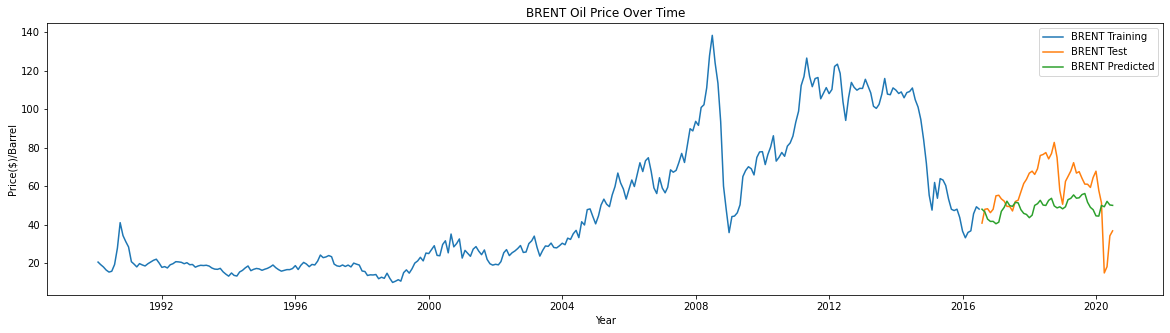

In [39]:
plt.figure(figsize=(20,5))
plt.xlabel('Year')
plt.ylabel('Price($)/Barrel')
plt.plot(BRENT_train,label="BRENT Training")
plt.plot(BRENT_test,label="BRENT Test")
plt.plot(BRENT_prediction,label="BRENT Predicted")
plt.title('BRENT Oil Price Over Time')
plt.legend(loc = 'Left corner')
plt.show()

#### As we can see in the figure above, the ARIMA model does a relatively good job of predicting the actual BRENT test data from 2016 to 2020

### Comparing the predicted ARAB LIGHT oil prices from our ARIMA models against the test data

In [40]:
ARAB_LIGHT_prediction = pd.DataFrame(ARAB_LIGHT_arima_model.predict(n_periods = 48),index=ARAB_LIGHT_test.index)
ARAB_LIGHT_prediction.columns = ['ARAB_LIGHT_predicted_oil_price']

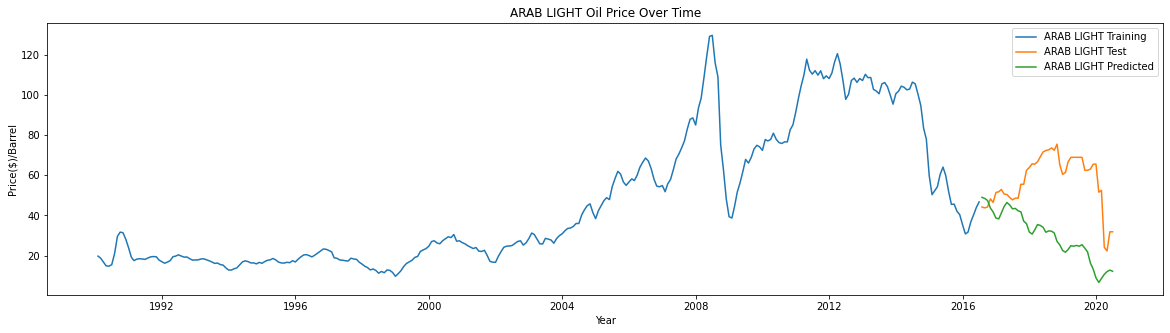

In [41]:
plt.figure(figsize=(20,5))
plt.xlabel('Year')
plt.ylabel('Price($)/Barrel')
plt.plot(ARAB_LIGHT_train,label="ARAB LIGHT Training")
plt.plot(ARAB_LIGHT_test,label="ARAB LIGHT Test")
plt.plot(ARAB_LIGHT_prediction,label="ARAB LIGHT Predicted")
plt.title('ARAB LIGHT Oil Price Over Time')
plt.legend(loc = 'Left corner')
plt.show()

#### As we can see in the figure above, the ARIMA model does a poor job of predicting the actual ARAB LIGHT test data from 2016 to 2020. This may be because we had more missing data for ARAB LIGHT which may have affected our ARIMA models. 

# Step 4c) Forecast 1 year into the future (to July 2021)

## Create index to July 2021

In [42]:
index_1_year=WTI_test.index
index_1_year = pd.date_range('2016-07-31', '2021-06-30', freq='M')                      

## WTI Forecast to July 2021

In [43]:
WTI_prediction_1year = pd.DataFrame(WTI_arima_model.predict(n_periods = 60),index=index_1_year)
WTI_prediction_1year.columns = ['WTI_prediction_1year']

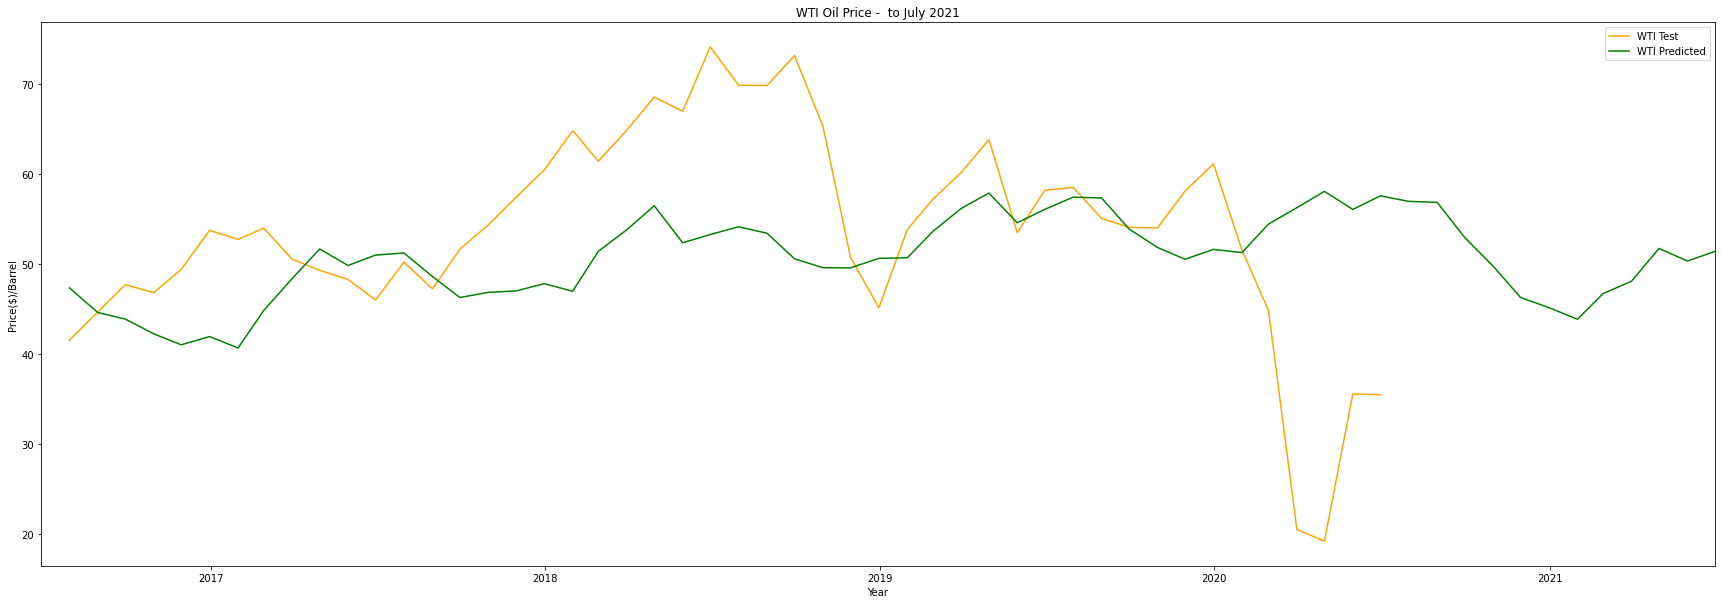

In [44]:
plt.figure(figsize=(30,10))
plt.xlabel('Year')
plt.ylabel('Price($)/Barrel')
plt.plot(WTI_test,label="WTI Test",c='Orange')
plt.plot(WTI_prediction_1year,label="WTI Predicted",c='Green')
plt.title('WTI Oil Price -  to July 2021')
plt.legend(loc = 'Left corner')
plt.xlim('2016-06-30','2021-06-30')
plt.show()

## BRENT Forecast to July 2021

In [45]:
BRENT_prediction_1year = pd.DataFrame(BRENT_arima_model.predict(n_periods = 60),index=index_1_year)
BRENT_prediction_1year.columns = ['BRENT_prediction_1year']

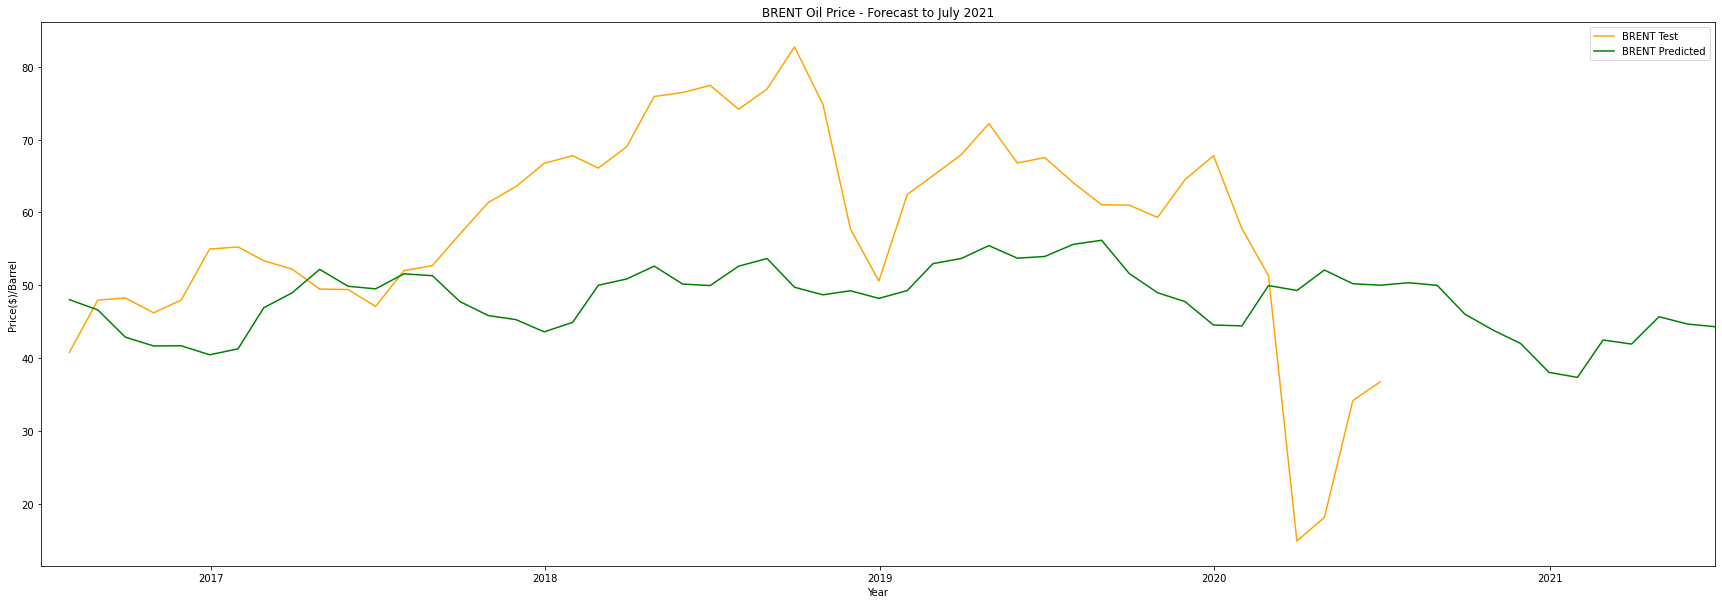

In [46]:
plt.figure(figsize=(30,10))
plt.xlabel('Year')
plt.ylabel('Price($)/Barrel')
plt.plot(BRENT_test,label="BRENT Test",c='Orange')
plt.plot(BRENT_prediction_1year,label="BRENT Predicted",c='Green')
plt.title('BRENT Oil Price - Forecast to July 2021')
plt.legend(loc = 'Left corner')
plt.xlim('2016-06-30','2021-06-30')
plt.show()

## ARAB LIGHT Forecast to July 2021

In [47]:
ARAB_LIGHT_prediction_1year = pd.DataFrame(ARAB_LIGHT_arima_model.predict(n_periods = 60),index=index_1_year)
ARAB_LIGHT_prediction_1year.columns = ['ARAB_LIGHT_prediction_1year']

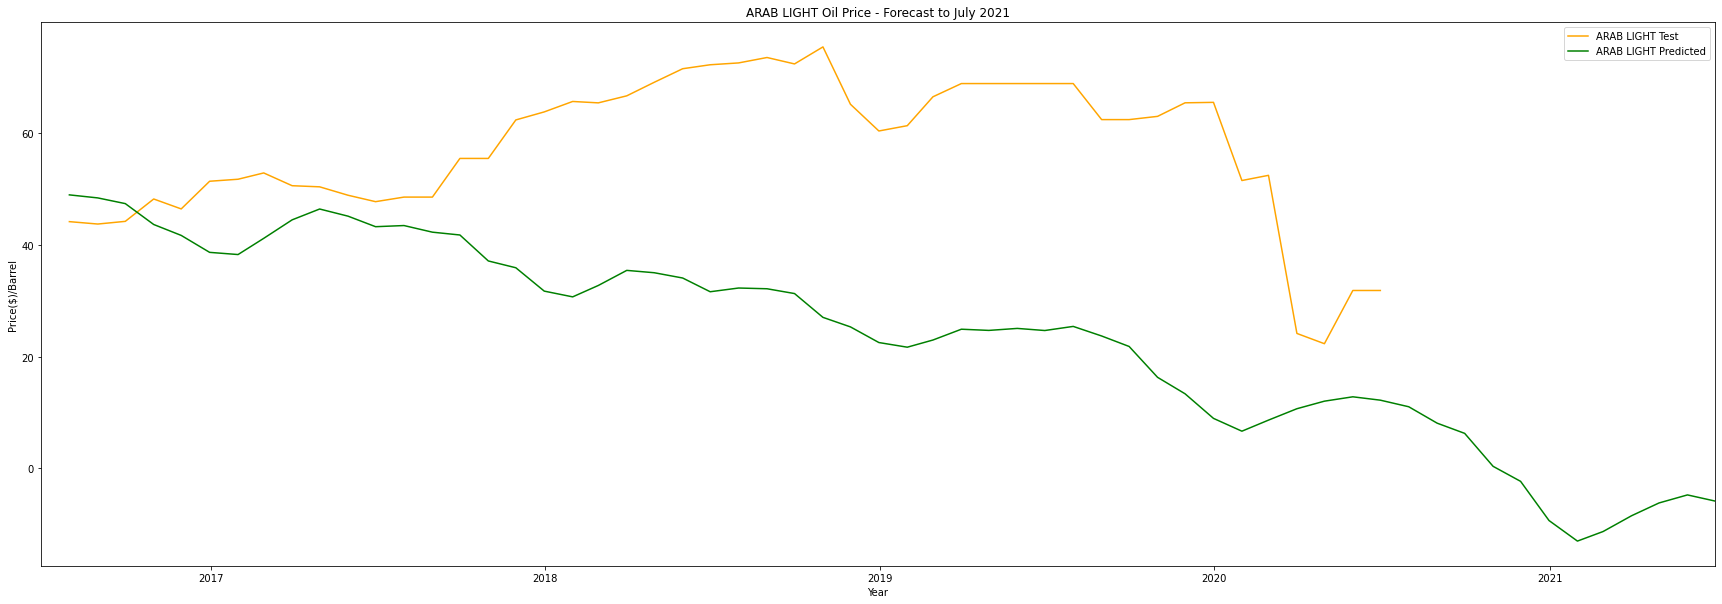

In [48]:
plt.figure(figsize=(30,10))
plt.xlabel('Year')
plt.ylabel('Price($)/Barrel')
plt.plot(ARAB_LIGHT_test,label="ARAB LIGHT Test",c='Orange')
plt.plot(ARAB_LIGHT_prediction_1year,label="ARAB LIGHT Predicted",c='Green')
plt.title('ARAB LIGHT Oil Price - Forecast to July 2021')
plt.legend(loc = 'Left corner')
plt.xlim('2016-06-30','2021-06-30')
plt.show()